This notebook shows how to 
- load mass photometry count data
- create and plot the mass histogram distribution 
- fit the distribution with a multi-gaussian
- plot the fittings

In [1]:
from pyphotomol import (
    MPAnalyzer,
    plot_histogram,
    plot_histograms_and_fits,
    LayoutConfig,
    LegendConfig
)

from scripts import display_figure_static # Only for static display, to be shown in GitHub

In [2]:
file = '../test_files/demo.h5'
mp = MPAnalyzer()

files = [file] * 10
names = [f'demo{i+1}' for i in range(10)]

mp.import_files(files, names=names)
mp.apply_to_all('count_binding_events')
# Create the histogram - same window and bin width for all files
mp.apply_to_all('create_histogram',use_masses=True, window=[0, 800], bin_width=10)

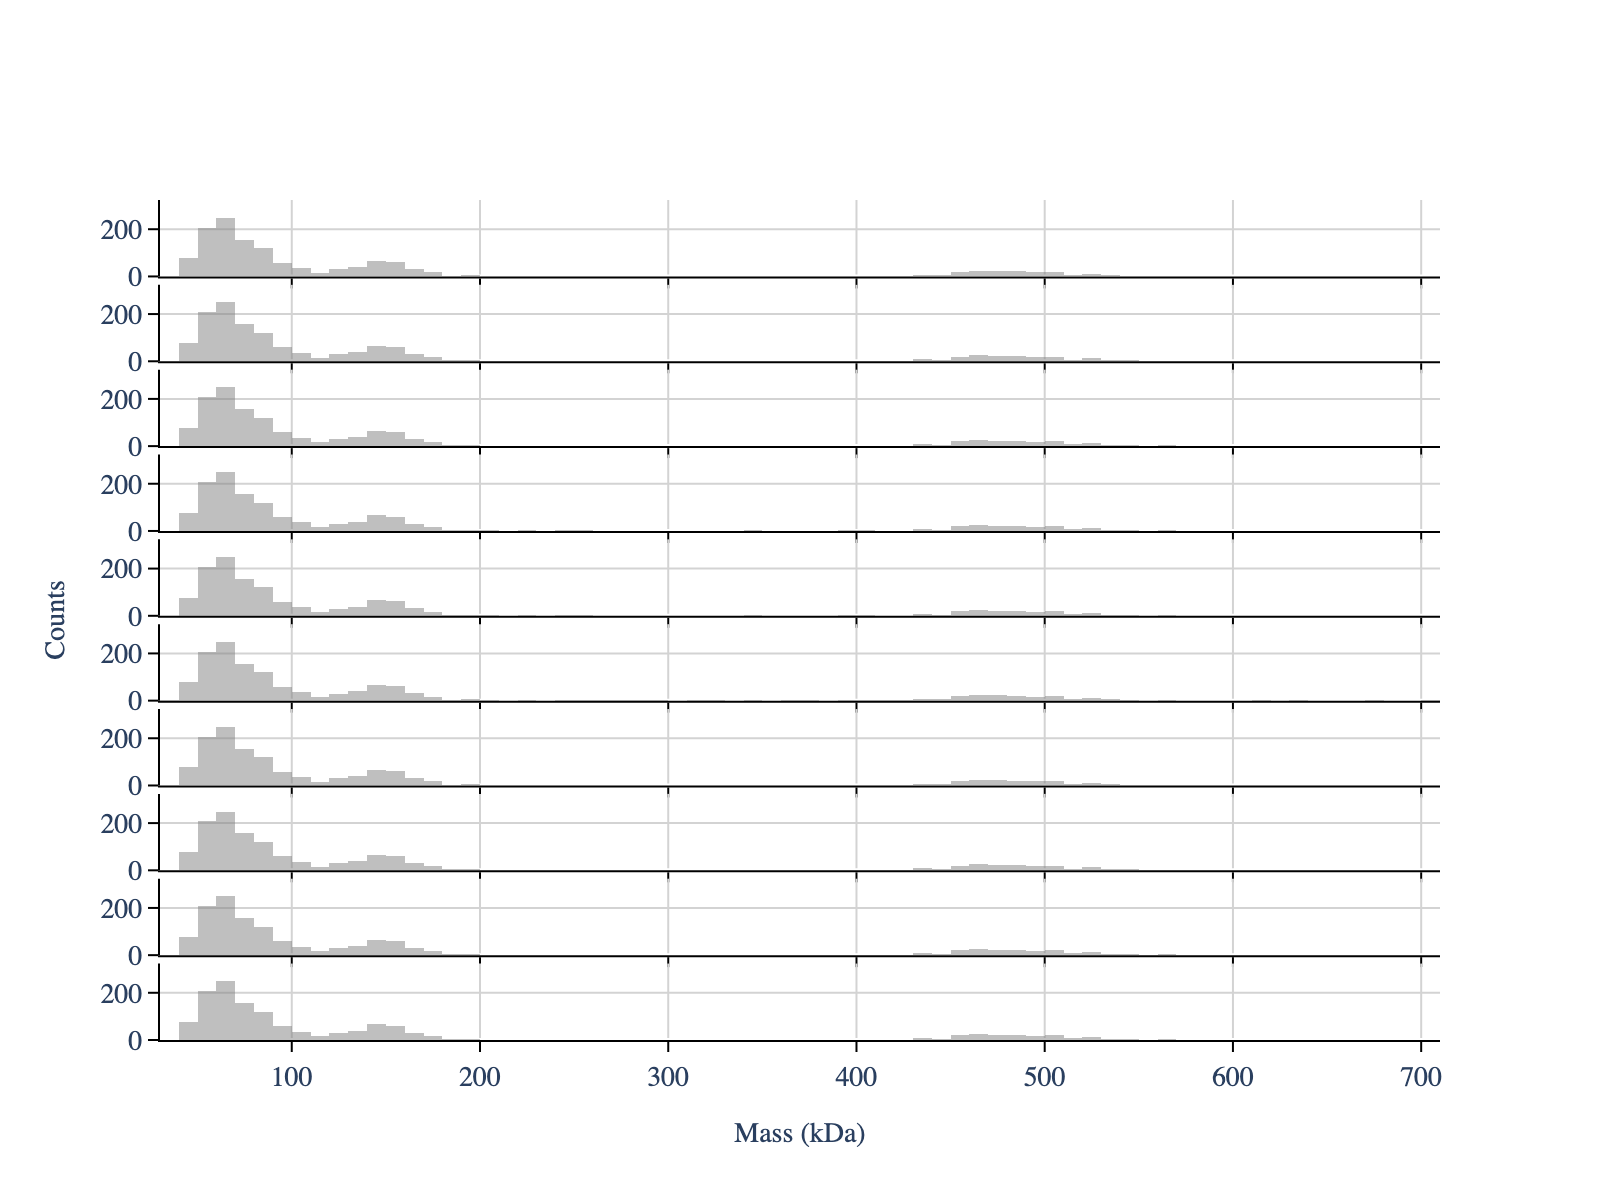

In [3]:
# Plot the mass distribution
colors = ['gray'] * len(files)

# Create configuration objects for customized plotting
layout_config = LayoutConfig(
    stacked=True,  # One plot per file
    show_subplot_titles=False,  # Hide subplot titles
    vertical_spacing=0.01,  # Vertical spacing between subplots
    extra_padding_y_label=0.02  # Extra padding for y-axis label to avoid overlap with axis ticks
)

fig = plot_histogram(mp,  # PhotoMol analyzer instance
                     colors,  # colors for each histogram
                     layout_config=layout_config)

display_figure_static(fig)

We can also view the unbinding events

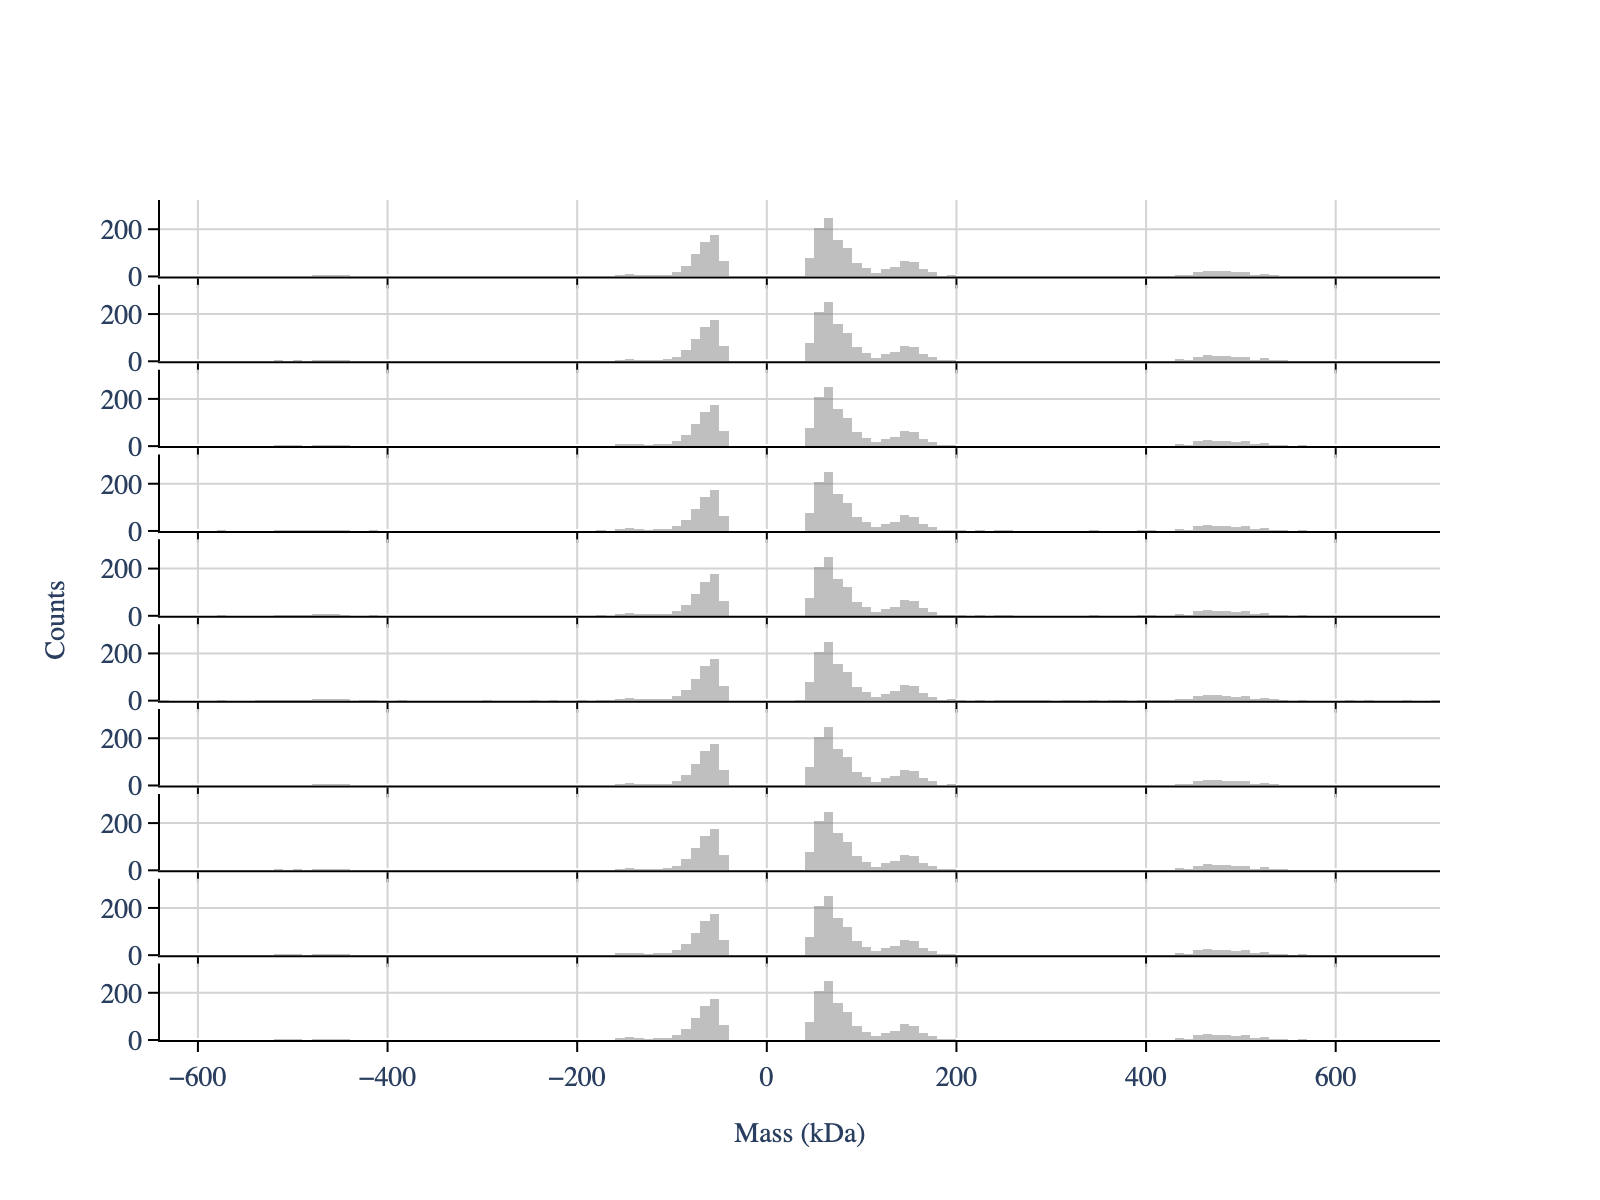

In [4]:
mp.apply_to_all('create_histogram',use_masses=True, 
                window=[-800, 800], # Important negative window to include unbinding events
                bin_width=10)

fig = plot_histogram(mp,  # PhotoMol analyzer instance
                     colors,  # colors for each histogram
                     layout_config=layout_config)

display_figure_static(fig)


In [5]:
# Re do the histogram with a positive window
mp.apply_to_all('create_histogram',use_masses=True, 
                window=[0, 800], # Important negative window to include unbinding events
                bin_width=10)

# Estimate the peak positions - only to use later as a guess for the fit
# It uses scipy's find_peaks function under the hood
mp.apply_to_all('guess_peaks',min_height=10, min_distance=4, prominence=4)

# Extract the peaks positions
mp.get_properties('peaks_guess')

[array([ 65., 145., 465.]),
 array([ 65., 145., 465.]),
 array([ 65., 145., 465.]),
 array([ 65., 145., 465.]),
 array([ 65., 145., 465.]),
 array([ 65., 145., 465.]),
 array([ 65., 145., 465.]),
 array([ 65., 145., 465.]),
 array([ 65., 145., 465.]),
 array([ 65., 145., 465.])]

In [6]:
# Fit the mass distribution using a multi gaussian 
mp.apply_to_all(method_name='fit_histogram',
                peaks_guess=[65,145,465], # Initial peak guess, same for both files
                mean_tolerance=100, # Tolerance for the mean of the gaussian
                std_tolerance=100, # Tolerance for the standard deviation of the gaussian
                threshold=40, # Minimum observed value for the massses
                baseline=0) # Baseline value for the fit

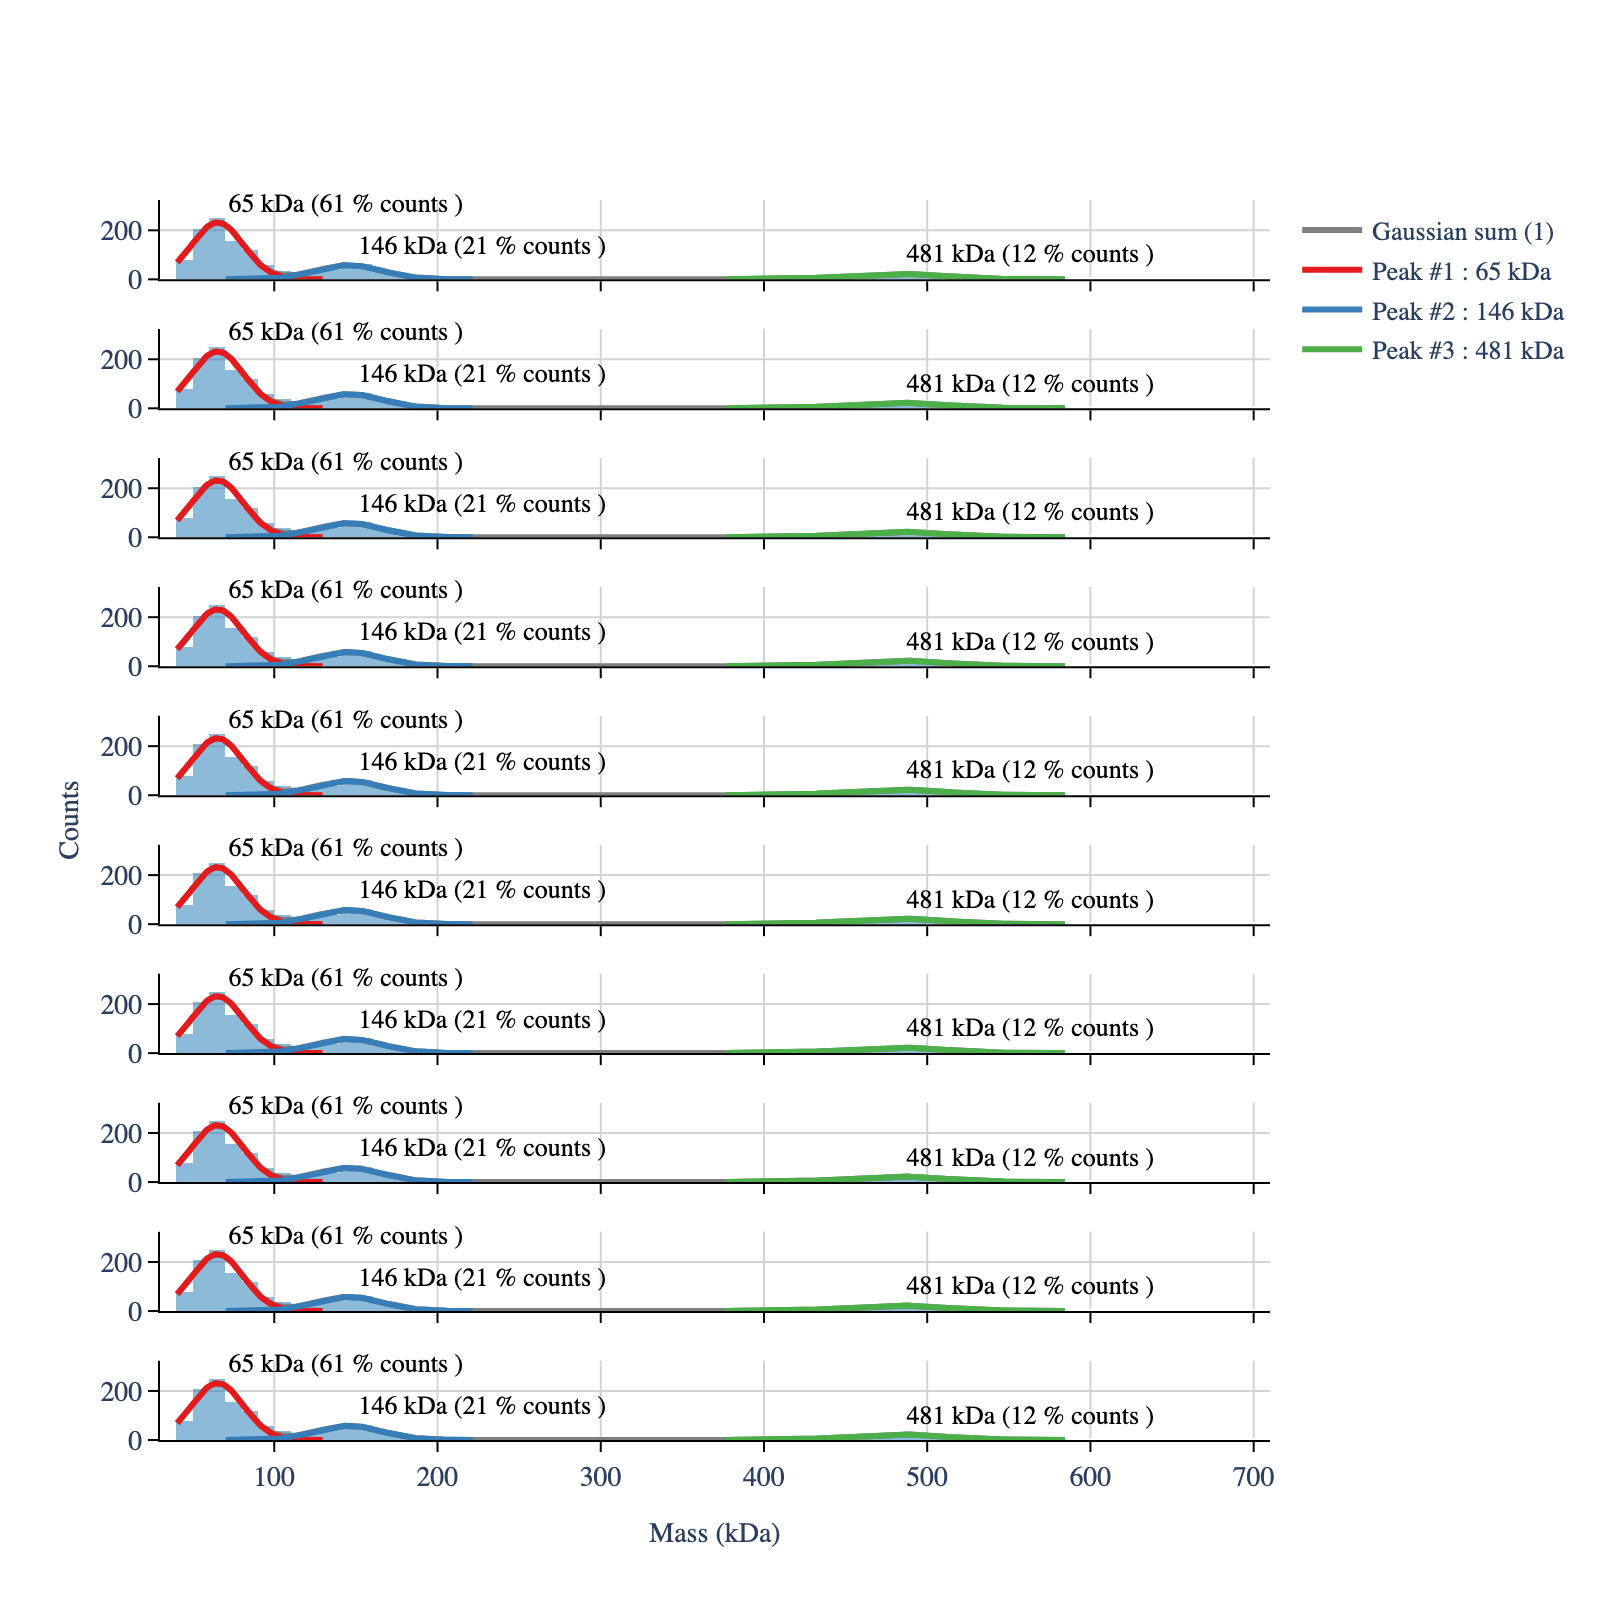

In [7]:
# Plot the mass distribution with the fit
legends_df, hist_df = mp.create_plotting_config()

colors_hist = hist_df['color'].tolist()

# The following list controls which legends are shown in the plot
show_legend_all = [False] * len(legends_df)
# Set the first four legends to True to show them
for i in range(4):
    show_legend_all[i] = True

# Create configuration objects for customized plotting
layout_config = LayoutConfig(
    stacked=True,
    vertical_spacing=0.04,
    extra_padding_y_label=0.02
)

legend_config = LegendConfig(
    line_width=3,
    show_legend_all=show_legend_all
)

fig = plot_histograms_and_fits(mp, 
                               legends_df=legends_df,
                               colors_hist=colors_hist,
                               layout_config=layout_config,
                               legend_config=legend_config)

display_figure_static(fig, height=800)

In [13]:
# Print the logbook
logbook = mp.get_batch_logbook()
for i, row in logbook.iterrows():
    print(f"Method: {row['method']}")
    # Print the parameters for each method
    for param, value in row['parameters'].items():
        print(f"  {param}: {value}")

Method: import_files
  files: ['../test_files/demo.h5', '../test_files/demo.h5', '../test_files/demo.h5', '../test_files/demo.h5', '../test_files/demo.h5', '../test_files/demo.h5', '../test_files/demo.h5', '../test_files/demo.h5', '../test_files/demo.h5', '../test_files/demo.h5']
  names: ['demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'demo7', 'demo8', 'demo9', 'demo10']
  n_files: 10
Method: apply_to_all
  method_name: count_binding_events
  target_models: ['demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'demo7', 'demo8', 'demo9', 'demo10']
  args: ()
  kwargs: {}
Method: apply_to_all
  method_name: create_histogram
  target_models: ['demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'demo7', 'demo8', 'demo9', 'demo10']
  args: ()
  kwargs: {'use_masses': True, 'window': [0, 800], 'bin_width': 10}
Method: apply_to_all
  method_name: create_histogram
  target_models: ['demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'demo7', 'demo8', 'demo9', 'demo10']
  args: ()
